In [1]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *

Loading imports


In [2]:
torch.cuda.set_device(3)

## Load Model

In [3]:
name = 'baseline_any_xse_resnext50'

In [4]:
dbch = get_data(512, 128)
learn = get_learner(dbch, xse_resnext50)

In [5]:
learn.model

Sequential(
  (0): Sequential(
    (0): ConvLayer(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): ConvLayer(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvLayer(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): ResBlock(
        (convs): Sequential(
          (0): ConvLayer(
            (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(128, eps

## Training

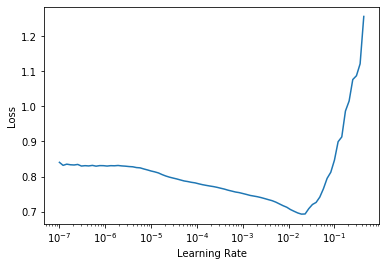

In [6]:
learn.lr_find()

In [7]:
do_fit(learn, 20, 1e-2)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.280003,0.300071,0.885552,0.792107,08:19
1,0.255429,0.322775,0.874436,0.754787,08:31
2,0.232681,0.264998,0.907783,0.823388,08:24
3,0.312058,0.498999,0.848506,0.636207,08:24
4,0.226101,0.233605,0.913998,0.840127,08:19
5,0.207772,0.217472,0.920280,0.858164,08:12
6,0.198629,0.224774,0.916890,0.862747,08:14
7,0.191234,0.200039,0.928389,0.870772,08:04
8,0.185634,0.204257,0.928469,0.873235,07:54
9,0.179278,0.196022,0.929868,0.876122,07:55


In [8]:
learn.dbunch = get_data(256, 256)
learn.load(f'runs/{name}-1')

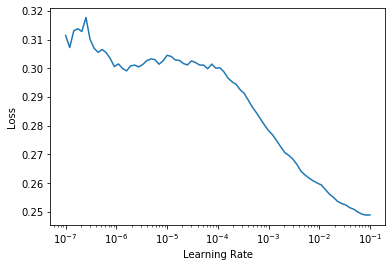

In [23]:
learn.lr_find()

In [9]:
do_fit(learn, 20, 1e-3)
learn.save(f'runs/{name}-2')

RuntimeError: CUDA out of memory. Tried to allocate 194.00 MiB (GPU 3; 23.65 GiB total capacity; 22.60 GiB already allocated; 34.00 MiB free; 132.18 MiB cached)

In [ ]:
learn.dbunch = get_data(512, 256, full_ds=True)
do_fit(learn, 2, 5e-4)
learn.save(f'runs/{name}-3-full')

## Submission

In [11]:
learn.load(f'runs/{name}-3-full')
sub_fn = f'subm/{name}'

In [12]:
learn.dbunch = get_test_data(meta.df_tst, bs=512, sz=None, tst_dir='tst_jpg256')

In [13]:
ob = learn.dbunch.one_batch()

In [16]:
preds,targs = learn.get_preds()

In [ ]:
pred_csv = submission(meta.df_tst, preds, fn=sub_fn)

In [20]:
from IPython.display import FileLink, FileLinks
from kaggle import api

In [21]:
FileLink(f'{sub_fn}.csv')

/home/ashaw/kaggle/rsna_retro/subm/baseline_any.csv

In [22]:
api.competition_submit(f'{sub_fn}.csv', 'train_02_any', 'rsna-intracranial-hemorrhage-detection')

100%|██████████| 26.0M/26.0M [00:04<00:00, 6.23MB/s]


Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [27]:
api.competitions_submissions_list('rsna-intracranial-hemorrhage-detection')[0]

{'ref': 13722309,
 'totalBytes': 27277209,
 'date': '2019-12-10T08:50:51.717Z',
 'description': 'train_02_any',
 'errorDescription': None,
 'fileName': 'baseline_any.csv',
 'publicScore': '0.72453',
 'privateScore': '0.07846',
 'status': 'complete',
 'submittedBy': 'Andrew Shaw',
 'submittedByRef': 'bearpelican',
 'teamName': 'Andrew Shaw',
 'type': 'standard',
 'url': 'https://www.kaggle.com/submissions/13722309/13722309.raw'}